# Job title Classification by industry

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Job titles and industries.csv')
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


# Data Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8586 entries, 0 to 8585
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job title  8586 non-null   object
 1   industry   8586 non-null   object
dtypes: object(2)
memory usage: 134.3+ KB


In [3]:
df.isna().sum()

job title    0
industry     0
dtype: int64

In [4]:
df['industry'].value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

(array([4746.,    0.,    0., 2031.,    0.,    0., 1435.,    0.,    0.,
         374.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

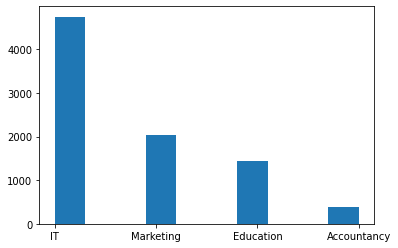

In [5]:
plt.hist(df['industry'])

### - there is no misiing data
### - there is an imbalance in the data

# Split the data to train and test

In [6]:
from sklearn.model_selection import train_test_split
y=df['industry']
X=df['job title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# The pipeline of the model

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer   # vectorize the data
from imblearn.over_sampling import SMOTE       # over sampling to solve the imbalance problem 
from sklearn.naive_bayes import MultinomialNB  # naive bayes multinomial model
from imblearn.pipeline import make_pipeline    # pipeline

model = make_pipeline(TfidfVectorizer(),SMOTE(), MultinomialNB())

# Fit the model

In [8]:
model.fit(X_train, y_train)
labels = model.predict(X_test)
labels

array(['Marketing', 'Marketing', 'Marketing', ..., 'IT', 'IT', 'IT'],
      dtype='<U11')

In [9]:
categories=['Accountancy','Education','IT','Marketing']

# Score

In [10]:
model.score(y_test,labels)

0.9202540578687368

In [11]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model, X, y, cv=5)
print("the 5 cvs are ",cv_results)
print("the mean is ",np.mean(cv_results))

the 5 cvs are  [0.91385332 0.94059406 0.93826441 0.90157251 0.8543972 ]
the mean is  0.9097363013025264


# The performance of the model

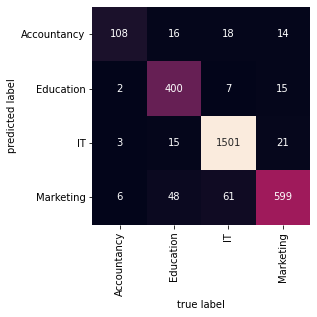

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

### After the over sampling the number of TP for the Accountancy increased

# Evaluate the model

In [13]:
print(categories)
from sklearn.metrics import precision_score, recall_score
print("precision",precision_score(y_test, labels,average=None))
print("recall",recall_score(y_test, labels,average=None))
from sklearn.metrics import confusion_matrix
print("confussion matrix ",confusion_matrix(y_test, labels))
from sklearn.metrics import f1_score
print("f1 score ",f1_score(y_test, labels,average=None))


['Accountancy', 'Education', 'IT', 'Marketing']
precision [0.69230769 0.94339623 0.97467532 0.83893557]
recall [0.90756303 0.83507307 0.9458097  0.9229584 ]
confussion matrix  [[ 108    2    3    6]
 [  16  400   15   48]
 [  18    7 1501   61]
 [  14   15   21  599]]
f1 score  [0.78545455 0.88593577 0.96002558 0.87894351]


# Plot the ROC curve of all classes  to evaluate the model

In [14]:
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

def plot_multiclass_roc(y_test,y_score, n_classes, figsize=(17, 6)):
    

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    y_score = pd.get_dummies(y_score, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=('ROC curve for ',categories[i]) )
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

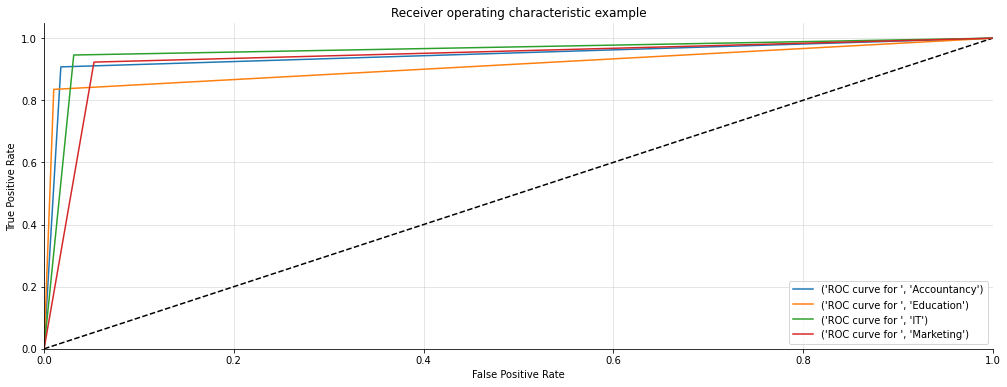

In [15]:
plot_multiclass_roc(y_test,labels, 4, figsize=(17, 6))

# Check the model 

In [16]:
def predict_category(s, model=model):
    pred = model.predict([s])
    return pred[0]

In [17]:
predict_category('calc ')

'Accountancy'

In [18]:
predict_category('programmer')

'IT'

In [19]:
predict_category('Teacher')

'Education'

In [20]:
predict_category('digital')

'Marketing'

# Dump the model to use it in flask

In [22]:
from joblib import dump , load 
dump(model,'model.joblib')

['model.joblib']